#Vinicius de Barros Silva 10335913

Epoch 1/80
600/600 - 6s - loss: 0.4465 - accuracy: 0.8407 - 6s/epoch - 10ms/step
Epoch 2/80
600/600 - 5s - loss: 0.3192 - accuracy: 0.8830 - 5s/epoch - 8ms/step
Epoch 3/80
600/600 - 4s - loss: 0.2779 - accuracy: 0.8980 - 4s/epoch - 7ms/step
Epoch 4/80
600/600 - 4s - loss: 0.2473 - accuracy: 0.9076 - 4s/epoch - 7ms/step
Epoch 5/80
600/600 - 4s - loss: 0.2266 - accuracy: 0.9166 - 4s/epoch - 7ms/step
Epoch 6/80
600/600 - 4s - loss: 0.2059 - accuracy: 0.9235 - 4s/epoch - 7ms/step
Epoch 7/80
600/600 - 4s - loss: 0.1894 - accuracy: 0.9294 - 4s/epoch - 7ms/step
Epoch 8/80
600/600 - 4s - loss: 0.1741 - accuracy: 0.9346 - 4s/epoch - 6ms/step
Epoch 9/80
600/600 - 4s - loss: 0.1604 - accuracy: 0.9404 - 4s/epoch - 7ms/step
Epoch 10/80
600/600 - 4s - loss: 0.1484 - accuracy: 0.9443 - 4s/epoch - 6ms/step
Epoch 11/80
600/600 - 4s - loss: 0.1353 - accuracy: 0.9506 - 4s/epoch - 6ms/step
Epoch 12/80
600/600 - 4s - loss: 0.1256 - accuracy: 0.9535 - 4s/epoch - 6ms/step
Epoch 13/80
600/600 - 4s - loss: 0.1

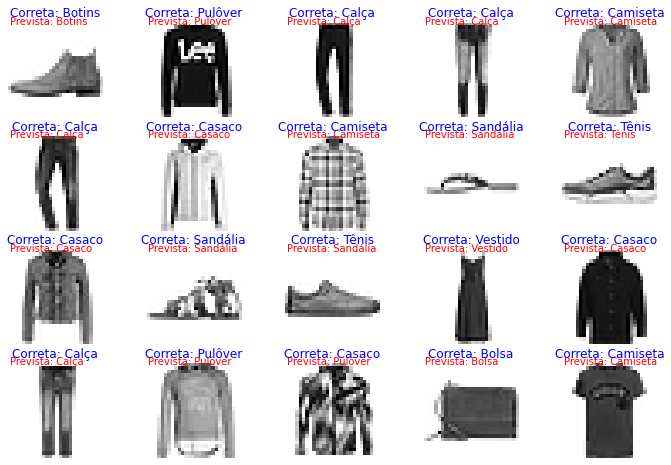

In [1]:
# mlp2.py
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Normalization
from tensorflow.keras import optimizers
import numpy as np; import sys
from matplotlib import pyplot as plt

(AX, AY), (QX, QY) = fashion_mnist.load_data()
AX=255-AX; QX=255-QX

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28

model = Sequential()
model.add(Normalization(input_shape=(nl,nc))) #Normaliza
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

opt=optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.get_layer(index=0).adapt(AX) #Calcula media e desvio
model.fit(AX, AY2, batch_size=100, epochs=80, verbose=2);

QP = model.predict(QX[0:20])
categories=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camiseta", "Tênis", "Bolsa", "Botins"]
f = plt.figure(figsize = (12,8))

for i in range(20):
    f.add_subplot(4,5,i+1)   
    plt.imshow(QX[i], cmap = 'gray')
    plt.axis("off")
    plt.title("Correta: " + categories[QY[i]],color="b")
    plt.text(0, 0,"Prevista: " + categories[QP[i].argmax()],color="r")

score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))
model.save('mlp2.h5')